# Assignment X: Topic Modeling Dcard

## Question 1

Use the `dcard` dataset and perform topic modeling on the dataset to explore the main topics of this small corpus.
To increase the interpretability of the topic modeling results, please word segment the corpus data using `ckip-transformers` and then include word tokens whose POS are `Na` or `Vc` for topic modeling.

## Import necessary dependencies and settings

In [197]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [14]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import nltk, random
from nltk.corpus import movie_reviews
from nltk.stem import PorterStemmer

pd.options.display.max_colwidth = 200
%matplotlib inline

## Sample corpus of text documents

In [215]:
corpus_df = pd.read_csv('../../../RepositoryData/data/dcard-top100.csv')
corpus_df.head()

,ID,title,content
0,235443715,三更 21歲這年我差點被活活燒死,部分回應在B117 \n謝謝各位的留言，我都有看完\n好的不好的，我都接受謝謝大家🙇‍♀️\n\n\n（第三次更新在這邊）\nB258 這邊也有講到怎麼逃生\n很多人好奇我是怎麼踹門的，\n在這邊跟大家說一下，\n因為這台車本來就很老舊，\n加上我文章說的我有停在路邊檢查，\n之前有在練空手道，所以比較知道怎麼施力😥\n謝謝大家的關心，其他比較有問題的我會在留言一一回覆！\n\n後續處理的...
1,235442609,超狂學經歷！195公分帥家教徵學生,https://i.imgur.com/REIEzSd.jpg\n\n身高195公分的男大生楊承翰在家教社團PO文徵學生的文章被網友推爆了，網友們看到他的學經歷及成績不禁大讚根本就是學霸王，而他不只擁有高顏質，還是籃球系隊成員，超乎常人的學經歷及證書考試成績，瞬間讓網友都跪著朝聖，直呼「天哪好厲害的帥哥」、「這個當家教太可惜了」。\n\n21歲台大學生楊承翰日前在臉書社團「家教補教學校兼全...
2,235441998,我的模特界時間管理大師前男友,看過這麼多在Dcard、PTT上的感情渣事和創作文\n從沒想過如此荒謬像八點檔的事情居然會發生在自己的身上\n\n本來以為與我交往一年的男友，是因為遠距離的關係分手，但就在我難過發文之後，我的IG私訊被各種匿名爆料塞爆，才發現交往一年的他幾乎是個我完全不認識的人（除了我被無數次劈腿，還有他幻謊症的部分，可能還有妄想症...）\n\n \n接下來的故事全部都是真真切切發生的事情，因為整段故事...
3,235441259,豆皮加爆,剛剛吃小火鍋，跟店員說不要金針菇（怕卡牙縫），於是店員幫我換其他配料..…\n\n沒想到餐一上桌竟是豆皮加爆~\n\n真是超開心的~有人也跟我一樣喜歡吃豆皮的嗎？\n\nhttps://i.imgur.com/XIma4y2.jpg
4,235442693,這樣女生該追嗎,已經約好見面，到了當天晚上七點半才回，我是被耍了嗎 \n如下圖\n\n\nhttps://i.imgur.com/81HRQpQ.jpg\nhttps://i.imgur.com/6lmTX1P.jpg\nhttps://i.imgur.com/bV4X0Fz.jpg


In [216]:
corpus = corpus_df['content']
# remove url first
corpus = [re.sub(r'(?:http(s)?:\/\/)?[\w.-]+(?:\.[\w\.-]+)+[\w\-\._~:/?#[\]@!\$&\'\(\)\*\+,;=.]+', '\n', doc) for doc in corpus]

corpus = [re.sub(r'\n+','\n', doc) for doc in corpus] 

In [217]:
corpus_df.iloc[65,]

ID                                                                                    235443810
title                                                                                 優質cosplay
content    https://megapx-assets.dcard.tw/images/57a22cb7-3880-4e83-97a1-510a691bd1d9/1280.jpeg
Name: 65, dtype: object

In [201]:
## check each doc integrity, i.e., no empty strings

corpus_line_num = [len(doc) for doc in corpus]
corpus[np.argmin(corpus_line_num)]

ind =[i for i in range(len(corpus_line_num)) if corpus_line_num[i]==0]
np.array(corpus)[ind]

array([], dtype='<U4276')

Perform the word segmentation in Google Colab.

In [57]:
# import ckip_transformers
# from ckip_transformers.nlp import CkipWordSegmenter, CkipPosTagger
# # Initialize drivers
# ws_driver = CkipWordSegmenter(level=3, device=-1)
# pos_driver = CkipPosTagger(level=3, device=-1)
# import re

# def my_tokenizer(doc):
#     # `doc`: a list of corpus documents (each element is a document long string)
#     cur_ws = ws_driver(doc, use_delim = True, delim_set='\n')
#     cur_pos = pos_driver(cur_ws)
#     doc_seg = [[(x,y) for (x,y) in zip(w,p)]  for (w,p) in zip(cur_ws, cur_pos)]
#     #cur_words = [(w.strip(),p) for (w,p) in zip(sum(cur_ws,[]), sum(cur_pos,[])) if p not in ['WHITESPACE']] # if re.match(r'^[nv]',p[0].lower())]
#     return doc_seg

# # def my_tokenizer(doc):
# #     # `doc`: a list of sentences of a specific doc
# #     cur_ws = ws_driver(doc, use_delim = True, delim_set='\n')
# #     cur_pos = pos_driver(cur_ws)
# #     cur_words = [(w.strip(),p) for (w,p) in zip(sum(cur_ws,[]), sum(cur_pos,[])) if p not in ['WHITESPACE']] # if re.match(r'^[nv]',p[0].lower())]
# #     return cur_words

In [97]:
# %%time
## Takes about 22 mins
# dcard_seg = my_tokenizer(corpus)

# with open('dcard_word_tag.pickle', 'wb') as f:
#     pickle.dump(dcard_word_tag, f, protocol=pickle.HIGHEST_PROTOCOL)

Tokenization: 100%|██████████| 8/8 [00:00<00:00, 3754.13it/s]


Inference: 100%|██████████| 1/1 [00:01<00:00,  1.76s/it]


Inference: 100%|██████████| 1/1 [00:06<00:00,  6.74s/it]

CPU times: user 21min 4s, sys: 20.9 s, total: 21min 25s
Wall time: 22min


In [202]:
import pickle
with open('dcard_seg.pickle', 'rb') as f:
    dcard_seg = pickle.load(f)

In [246]:
## From each document, keep only words tagged as N*
norm_corpus = [' '.join([w for (w,t) in doc if t in ['Na','VC']]) for doc in dcard_seg]# if len(doc)>0]

In [247]:
dcard_seg[65]

[('\n', 'WHITESPACE')]

In [248]:
# check any zero documents
[(i,doc) for i, doc in enumerate(norm_corpus) if len(doc)==0]

[(65, '')]

In [249]:
norm_corpus[65]

''

In [252]:
corpus_df.iloc[65,]

ID                                                                                    235443810
title                                                                                 優質cosplay
content    https://megapx-assets.dcard.tw/images/57a22cb7-3880-4e83-97a1-510a691bd1d9/1280.jpeg
Name: 65, dtype: object

In [253]:
corpus_df2 = corpus_df.drop(index=[65])
del norm_corpus[65]

In [254]:
corpus_df2.iloc[0:10]

,ID,title,content
0,235443715,三更 21歲這年我差點被活活燒死,部分回應在B117 \n謝謝各位的留言，我都有看完\n好的不好的，我都接受謝謝大家🙇‍♀️\n\n\n（第三次更新在這邊）\nB258 這邊也有講到怎麼逃生\n很多人好奇我是怎麼踹門的，\n在這邊跟大家說一下，\n因為這台車本來就很老舊，\n加上我文章說的我有停在路邊檢查，\n之前有在練空手道，所以比較知道怎麼施力😥\n謝謝大家的關心，其他比較有問題的我會在留言一一回覆！\n\n後續處理的...
1,235442609,超狂學經歷！195公分帥家教徵學生,https://i.imgur.com/REIEzSd.jpg\n\n身高195公分的男大生楊承翰在家教社團PO文徵學生的文章被網友推爆了，網友們看到他的學經歷及成績不禁大讚根本就是學霸王，而他不只擁有高顏質，還是籃球系隊成員，超乎常人的學經歷及證書考試成績，瞬間讓網友都跪著朝聖，直呼「天哪好厲害的帥哥」、「這個當家教太可惜了」。\n\n21歲台大學生楊承翰日前在臉書社團「家教補教學校兼全...
2,235441998,我的模特界時間管理大師前男友,看過這麼多在Dcard、PTT上的感情渣事和創作文\n從沒想過如此荒謬像八點檔的事情居然會發生在自己的身上\n\n本來以為與我交往一年的男友，是因為遠距離的關係分手，但就在我難過發文之後，我的IG私訊被各種匿名爆料塞爆，才發現交往一年的他幾乎是個我完全不認識的人（除了我被無數次劈腿，還有他幻謊症的部分，可能還有妄想症...）\n\n \n接下來的故事全部都是真真切切發生的事情，因為整段故事...
3,235441259,豆皮加爆,剛剛吃小火鍋，跟店員說不要金針菇（怕卡牙縫），於是店員幫我換其他配料..…\n\n沒想到餐一上桌竟是豆皮加爆~\n\n真是超開心的~有人也跟我一樣喜歡吃豆皮的嗎？\n\nhttps://i.imgur.com/XIma4y2.jpg
4,235442693,這樣女生該追嗎,已經約好見面，到了當天晚上七點半才回，我是被耍了嗎 \n如下圖\n\n\nhttps://i.imgur.com/81HRQpQ.jpg\nhttps://i.imgur.com/6lmTX1P.jpg\nhttps://i.imgur.com/bV4X0Fz.jpg
5,235441122,深夜被約砲哥開導4小時哭了,嗨！巨砲哥 答應你的文來了😆\n這是一段與約砲小哥哥談心的奇幻旅程\n\n可憐的我情人節當天被前男友提分手\n原本說好228連假要一起出去玩直接泡湯\n昨天晚上一整個很鬱卒 \n但又不想一直丟負能量給身邊朋友\n所以就上wootalk找人聊聊\n結果就遇到這個傳說中的暖男(?)巨砲哥\nhttps://i.imgur.com/nlzrqS3.jpg\n\n劈頭就問胸部多大⋯\n本來想按離開...
6,235442321,這樣真很暴露？？？,https://i.imgur.com/HCTwyAH.jpg\n（圖片非本人）\n今天逛街買了一件此類型的白色，但他有點透，所以裡面有配一件白色小可愛，但男友說還是太暴露！？想問各位男性朋友 可以接受女友穿這件衣服嗎？🤔
7,235442924,泳衣+裙會很怪嗎,https://i.imgur.com/RWJLK2v.jpg\n\n因為馬鞍很寬\n想請問女孩們會覺得加這種裙式沙龍好嗎？\n怕會不會很奇怪\n看模特兒穿又覺得蠻好看的\n怕實際穿出去會怪怪的
8,235441419,關於一個860的訂製蛋糕：）,手機排版請見諒😖🙏🏻（圖多）\n先說這不是我第一次訂購訂製蛋糕\n也了解訂製蛋糕不可能跟圖上一樣完美\n看到這間的ig上照片都很漂亮才選擇這間的\n\nhttps://i.imgur.com/fETTnah.jpg\n這張是訂購時給的參考圖\n\nhttps://i.imgur.com/XsBjPYR.jpg\n這張是我拿到後打開的樣子\n\n以下附上對話記錄\nhttps://i.img...
9,235440762,有女生提醒我男友吃早餐,https://i.imgur.com/6Yk9etg.jpg\n想在這裡問大家有沒有接到這種電話⋯\n我男友前幾個月有接到一次，電話內容就只有女生用嗲嗲的聲音提醒我男友吃早餐這樣而已。電話掛了之後男友也有跟我說是他不認識的。\n\n但因為自己心裡存有懷疑，隔天在上班的時候有叫男同事用我手機打過去問（男友有給我她的手機號碼截圖\n\n男同事一開始就問她是不是那位提醒自己吃早餐的那個女生，後...


In [255]:
print(corpus_df.shape)
print(corpus_df2.shape)
print(len(norm_corpus))

(100, 3)
(99, 3)
99


In [258]:
corpus_df2['Normalized'] = norm_corpus
corpus_df2

,ID,title,content,Normalized
0,235443715,三更 21歲這年我差點被活活燒死,部分回應在B117 \n謝謝各位的留言，我都有看完\n好的不好的，我都接受謝謝大家🙇‍♀️\n\n\n（第三次更新在這邊）\nB258 這邊也有講到怎麼逃生\n很多人好奇我是怎麼踹門的，\n在這邊跟大家說一下，\n因為這台車本來就很老舊，\n加上我文章說的我有停在路邊檢查，\n之前有在練空手道，所以比較知道怎麼施力😥\n謝謝大家的關心，其他比較有問題的我會在留言一一回覆！\n\n後續處理的...,回應 留言 看完 接受 更新 人 踹 門 車 文章 路 練 空手道 問題 留言 車 車 地方 平台 訂 車 平台 家人 平台 聯繫 開 事故 會議 平台 律師 態度 錢 談話 燒壞 東西 浩劫 接受 人命 平台 律師 上訴 車子 鑑定 鑑定完 正文 朋友們 吃 燒烤 車 高鐵 開 車 人 車 平台 車 服務 車 資料 取 車 時候 老闆 派錯 人手 搭 計程車 牽 車 按 計程車 證明聯 ...
1,235442609,超狂學經歷！195公分帥家教徵學生,https://i.imgur.com/REIEzSd.jpg\n\n身高195公分的男大生楊承翰在家教社團PO文徵學生的文章被網友推爆了，網友們看到他的學經歷及成績不禁大讚根本就是學霸王，而他不只擁有高顏質，還是籃球系隊成員，超乎常人的學經歷及證書考試成績，瞬間讓網友都跪著朝聖，直呼「天哪好厲害的帥哥」、「這個當家教太可惜了」。\n\n21歲台大學生楊承翰日前在臉書社團「家教補教學校兼全...,身高 男 大生 家教 社團 徵 學生 文章 網友 推爆 網友 們 學經歷 成績 學霸王 顏質 籃球 系隊 成員 常人 學經歷 證書 考試 成績 網友 天 帥哥 家教 學生 臉書 社團 家教 補教 師訓 時薪 找 家教 學生 內容 英文 數學 理化 程式 語言 範圍 接受 貼文 學經歷 學歷 大三 主修 資工 數學 實驗 醫學 研究生 新冠 專案 訪問生 中英文 經驗 對 家教 經驗 學生 ...
2,235441998,我的模特界時間管理大師前男友,看過這麼多在Dcard、PTT上的感情渣事和創作文\n從沒想過如此荒謬像八點檔的事情居然會發生在自己的身上\n\n本來以為與我交往一年的男友，是因為遠距離的關係分手，但就在我難過發文之後，我的IG私訊被各種匿名爆料塞爆，才發現交往一年的他幾乎是個我完全不認識的人（除了我被無數次劈腿，還有他幻謊症的部分，可能還有妄想症...）\n\n \n接下來的故事全部都是真真切切發生的事情，因為整段故事...,看過 感情 渣事 創作 文 八點檔 事情 身 男友 距離 關係 私訊 塞爆 人 幻謊症 故事 事情 故事 牽扯 人 故事 講起 故事 時間 管理 大師 男友 女 主角 加我 背景 距離 期間 疫情 時間 距離 時間 整體 形象 外表 紳士 拍 廣告 機票 廠商 包 邀請 找 攝影師 大哥 房 訂 牽 手 關係 心理 建設 鼓起 勇氣 附 手機 照片 時間 地點 月 疫情 月 時間 態度 月...
3,235441259,豆皮加爆,剛剛吃小火鍋，跟店員說不要金針菇（怕卡牙縫），於是店員幫我換其他配料..…\n\n沒想到餐一上桌竟是豆皮加爆~\n\n真是超開心的~有人也跟我一樣喜歡吃豆皮的嗎？\n\nhttps://i.imgur.com/XIma4y2.jpg,吃 火鍋 店員 要 金針菇 卡 店員 換 配料 餐 豆皮 加 人 吃 豆皮
4,235442693,這樣女生該追嗎,已經約好見面，到了當天晚上七點半才回，我是被耍了嗎 \n如下圖\n\n\nhttps://i.imgur.com/81HRQpQ.jpg\nhttps://i.imgur.com/6lmTX1P.jpg\nhttps://i.imgur.com/bV4X0Fz.jpg,耍
...,...,...,...,...
95,235444562,主題：💟愛情塔羅💟 他要的感情關係vs 我要的感情關係為何？兩個人的近期發展（曖昧/交往中/斷聯/復合）,🤗感謝我們之間的連結帶領你來到這裡！ \n\n主題：💟愛情塔羅💟 他要的感情關係vs 我要的感情關係為何？兩個人的近期發展（曖昧/交往中/斷聯/復合）\n\n本次的大眾占卜適合處在曖昧、交往中、剛斷聯、分手、期待的你，有時候一份感情的重要核心正是在於雙方要的是不是一樣的東西，不見得得要完全相同，但至少如果理解彼此的感情需求，在相處上也能夠更融洽嘍！\n\n⭐️請閉上眼睛，深呼吸，腦子專心裡...,連結 主題 愛情 要 感情 關係 要 感情 關係 人 發展 感情 核心 要 東西 感情 需求 閉上 眼睛 腦子 要 感情 關係 要 樣子 人 點滴 張開 眼睛 牌卡 選出 連結 選 牌卡 天使 看 連結 天使 天使 天使 天使 天使 選 感覺 牌 找到 文字 解答 影片 解答 參考 影片 視頻 時間軸 選 牌 天使 天使 天使 天使 天使 文字 解答 祝福
96,235441027,#分享 老花古董包 LV 方盒子｜Celine 化妝箱,近期購入的兩款古董包 可能因為是新歡 所以都讓我愛不釋手(๑•̀ •́)و✧\n不過正是古董包的緣故 包況總有些不盡理想的狀況 帶有小瑕疵的部分 我自己都可以接受\n為了比較包包的容量 文內有帶到一小部分的what’s in my bag 也有實揹照的部分*ˊᵕˋ\n\n\n\n𓎘𓎘𓎘 Louis Vuitton monogram 開口笑方盒子\n（名字是參考小紅書介紹）\n\n購入價格：...,購入 古董包 新歡 古董包 緣故 包況 狀況 瑕疵 接受 比較 包包 容量 文 帶到 實 揹照 笑 方盒子 名字 參考 書 購入 價格 購入 方式 尺寸 容量 暗層 單肩包 媽媽 生日 禮物 藏 看 購入 媽媽 留 用 容量 物品 帶 保溫瓶 放入 保溫瓶 放入 小說 照片 拍 照片 參考 個子 身形 暗層 放 面紙 放 口紅 護唇膏 拉鍊 夾層 放 悠遊卡 化妝箱 購入 價格 購入 方式...
97,235447320,在公車上遇到的超尷尬事件,剛剛在公車上有一個阿伯下車前跟我說：妹妹你很有愛心欸 讓位置給別人 不像有些人都在裝睡\n講完這句話還瞄了一眼旁邊的女生\n我當下就笑笑的\n可是阿伯\n那個女生\n-\n-\n-\n是我朋友(^_^;)\n幸好阿伯講完就下車了⋯\nhttps://i.imgur.com/htuMwVw.jpg,公車 阿伯 妹妹 愛心 位置 人 講完 話 瞄 女生 阿伯 女生 朋友 阿伯 講完
98,235440749,#大眾占卜 🥺。他現在對我的想法是?他的下一步是什麼?我能為這段關係做什麼樣的努力❣,大家好這裡是金魚🙏\n這次的占卜適合斷聯、曖昧、復合的族群\n\n再上圖之前先置入我的IG\nhttps://www.instagram.com/goldenfishtarot\n\n【大眾占卜集合多人能量請選擇有感應的部分聆聽即可】\n喜歡有聲版請點連結\n喜歡文字下面附上文案\nhttps://youtu.be/xkJHmyl_M7g\n\nhttps://i.imgur.com/Ux...,金魚 族群 圖 置入 人 能量 選擇 感應 聆聽 點 連結 文字 附上 文案 對象 感情 騙 錢 關 遇見 心房 打開 過程 愛 感情 家庭 熱情 感染力 感情 方式 樣子 帶來 副作用 圍繞 生活 面對 事 心 關卡 捲進 麻煩 感情 選 資本 做 距離 個性 面對 生活 關卡 打出 安全牌 冒 風險 突破 現實 條件 做 切斷 後路 做出 抉擇 理性 配合 內心 想法 做出 行動 關係...


In [207]:
## check `norm_corpus`
len(norm_corpus)
norm_corpus[10]

'日系 妝容 剪 頭髮 換 髮型 頭髮 打 日系 感覺 妝容 剪 頭髮 興趣 妝 附上 素顏 封面 妝容 剪完 髮 私心 大愛 橘色 妝容 整體 眼線筆 睫毛膏 選擇 顏色 附上 彩妝品 眼妝 眼影 打底色 膏體 腮紅 做 腮紅 眼睛 手 上 眼影 發色 微飛粉 沾取 量 艾杜紗 眼線筆 眼線 膠筆 鉛 丹橘 芯 畫 手 感覺 妝 更新 持久性 艾杜紗 睫毛 底膏 粉色 擦 感覺 作用 上 睫毛膏 艾杜紗 艾 潤唇蜜 嘴 自然感 橘 裸色 畫 唇型 疊加 眼妝 眼影 塗 眼窩 塗 雙眼皮 折 疊擦 眼 疊擦 眼影 塗滿 眼下 疊加 亮橘 眼妝 完成 紫粉色 基底 整體 人 附上 彩妝品 眼妝 眼影 組合 攜帶型 眼影 排 眼影 單色 眼影 閃片 擦 拿來 打亮 眼頭 金 混 白色 珠光 金色 亮片 推 新手 買 塗 打 底色 手 眼皮 妝感 眼線 阻力 經典 眼線 眼線液 眼線筆 用 拿 畫 眼線 眼妝 秘密 棕色 眼 黑色 咖啡 腮紅 小花 腮紅 紫羅蘭 小花 腮紅 發色 用 口紅 細白管 玫瑰色 粉顏 色調 眼妝 眼影 塗 眼窩 塗 雙眼皮 折中 刷子 沾取 打 眼下 加強 眼皮 閃度 疊 眼影 塗 地方 疊擦 眼妝 刷子 完成 日系 妝容 問題 留言 觀看 妝容 實拍 影片 髮型'

## Bag of Words Model

- Bag-of-words model is the simplest way to vectorize texts into numeric representations.
- In short, it is a method to represent a text using its word frequency list.
- The sequential order of words in the text is therefore naively ignored.

In [259]:
from sklearn.feature_extraction.text import CountVectorizer
# get bag of words features in sparse format
cv = CountVectorizer(min_df=2, max_df=1.0,token_pattern=r'[^\s0-9]+')
cv_matrix = cv.fit_transform(norm_corpus)
cv_matrix

<99x718 sparse matrix of type '<class 'numpy.int64'>'
	with 2789 stored elements in Compressed Sparse Row format>

In [260]:
# view dense representation 
# warning might give a memory error if data is too big
cv_matrix = cv_matrix.toarray()
cv_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [261]:
# get all unique words in the corpus
vocab = np.array(cv.get_feature_names())
# show document feature vectors
pd.DataFrame(cv_matrix, columns=vocab)

,上,上衣,上身,下,下午茶,下載,丟,中文,中餐,主人,...,騙,體重,魅力,魚,鳥,黃色,黑,黑色,點,鼓起
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


## Latent Dirichlet Allocation

In [262]:
num_of_topic = 4

In [267]:
%%time
from sklearn.decomposition import LatentDirichletAllocation


lda = LatentDirichletAllocation(n_components=num_of_topic, max_iter=1000, random_state=0,
                               max_doc_update_iter=50, learning_method='online',
                               batch_size=50, learning_offset = 50, n_jobs = -1)
dt_matrix = lda.fit_transform(cv_matrix) # document matrix

CPU times: user 10.7 s, sys: 918 ms, total: 11.6 s
Wall time: 24.2 s


In [268]:
features = pd.DataFrame(dt_matrix, columns = ["T"+str(n) for n in range(1,num_of_topic+1)])
features

,T1,T2,T3,T4
0,0.43273,0.00284,0.00282,0.56162
1,0.15363,0.00484,0.00455,0.83698
2,0.00134,0.00133,0.00133,0.99600
3,0.02217,0.02104,0.02272,0.93407
4,0.25000,0.25000,0.25000,0.25000
...,...,...,...,...
94,0.00469,0.00481,0.00463,0.98587
95,0.98663,0.00441,0.00445,0.00451
96,0.02550,0.02528,0.02518,0.92404
97,0.00208,0.00212,0.00208,0.99372


## Show topics and their weights

In [156]:
# tt_matrix = lda.components_ # topic matrix
# for topic_weights in tt_matrix:
#     topic = [(token, weight) for token, weight in zip(vocab, topic_weights)]
#     topic = sorted(topic, key=lambda x: -x[1])
#     topic = [item for item in topic if item[1] > 0.6]
#     print(topic)
#     print()


In [269]:
topic_terms = lda.components_
top_terms = 20
topic_keywords_idxs = np.argsort(-np.absolute(topic_terms), axis=1)[:,:top_terms]
topic_keywords = vocab[topic_keywords_idxs]
topics = [', '.join(w) for w in topic_keywords]
pd.set_option('display.max_colwidth', -1)
topics_df = pd.DataFrame(topics,
                        columns = ['Keywords per Topic'],
                        index = ["Topic"+str(n) for n in range(1,num_of_topic+1)])

In [270]:
topics_df

,Keywords per Topic
Topic1,"買, 穿, 穿搭, 衣服, 包包, 放, 洋裝, 吃, 看, 搭, 時候, 鞋子, 白色, 背心, 用, 東西, 搭配, 購入, 黑色, 車"
Topic2,"舞台, 人, 影片, 們, 歌, 看, 粉絲, 文章, 節目, 主打, 附上, 寶寶, 推, 看看, 時候, 孩子, 朋友, 微博, 歌曲, 推特"
Topic3,"眼影, 用, 人, 顏色, 腮紅, 唇膏, 粉底液, 妝容, 眼妝, 感覺, 畫, 粉底, 擦, 底妝, 唇釉, 質地, 妝感, 塗, 手, 頭髮"
Topic4,"人, 時候, 看, 吃, 男友, 朋友, 感情, 時間, 事, 蛋糕, 關係, 電話, 做, 月, 故事, 找, 工作, 女生, 事情, 問題"


In [271]:
pd.options.display.float_format = '{:,.5f}'.format
pd.set_option('display.max_colwidth', 200)


dt_df = pd.DataFrame(dt_matrix,
                    columns=["Topic"+str(n) for n in range(1,num_of_topic+1)])

max_contrib_topics = dt_df.max(axis=0)
dominant_topics = max_contrib_topics.index
contrib_perc = max_contrib_topics.values
document_numbers = [dt_df[dt_df[t]==max_contrib_topics.loc[t]].index[0]
                    for t in dominant_topics]
documents = [norm_corpus[i] for i in document_numbers]

documents_df = pd.DataFrame({'Dominant Topic': dominant_topics,
                            'Contribution%': contrib_perc,
                            'DOCID': document_numbers,
                            'Topic': topics_df['Keywords per Topic'],
                            'Text': documents})

In [272]:
documents_df

,Dominant Topic,Contribution%,DOCID,Topic,Text
Topic1,Topic1,0.99348,71,"買, 穿, 穿搭, 衣服, 包包, 放, 洋裝, 吃, 看, 搭, 時候, 鞋子, 白色, 背心, 用, 東西, 搭配, 購入, 黑色, 車",穿搭 放 主題 穿搭 問題 建議 留言 大地 色系 路線 洋裝 搭配 腰帶 比例 帽子 包包 選用 奶茶色 提高 整體 色彩 一致性 配 咖啡色 馬丁鞋 完成 買 洋裝 故事 話 古著 洋裝 衣服 小姐 店家 看 看 拿起 洋裝 試穿 帶回 錢包 領 友人 友人 打開 錢包 店員 姊姊 帶走 吃 大餐 現金 留 衣服 穿搭 資訊 帽子 洋裝 包包 鞋子 女孩 路線 整體 色系 暗色 黑色 ...
Topic2,Topic2,0.97997,84,"舞台, 人, 影片, 們, 歌, 看, 粉絲, 文章, 節目, 主打, 附上, 寶寶, 推, 看看, 時候, 孩子, 朋友, 微博, 歌曲, 推特",歌 團體 挑出 非 主打 粉絲 發 文章 女團 推 推 歌 麒麟 椰澀 場面 歌 治癒 人心 粉墨 主打 孩子 們 歌 聲音 偏題 推薦 非 主打 孩子 們 孩子 們 特色 女友 歌 商演 唱 歌 音響 高音 主唱 歌 印象 歌曲 夢想 補 文 神仙 主打 主打 光 頂跨 打 歌舞台 看 到
Topic3,Topic3,0.99350,10,"眼影, 用, 人, 顏色, 腮紅, 唇膏, 粉底液, 妝容, 眼妝, 感覺, 畫, 粉底, 擦, 底妝, 唇釉, 質地, 妝感, 塗, 手, 頭髮",日系 妝容 剪 頭髮 換 髮型 頭髮 打 日系 感覺 妝容 剪 頭髮 興趣 妝 附上 素顏 封面 妝容 剪完 髮 私心 大愛 橘色 妝容 整體 眼線筆 睫毛膏 選擇 顏色 附上 彩妝品 眼妝 眼影 打底色 膏體 腮紅 做 腮紅 眼睛 手 上 眼影 發色 微飛粉 沾取 量 艾杜紗 眼線筆 眼線 膠筆 鉛 丹橘 芯 畫 手 感覺 妝 更新 持久性 艾杜紗 睫毛 底膏 粉色 擦 感覺 作用 上 ...
Topic4,Topic4,0.99731,39,"人, 時候, 看, 吃, 男友, 朋友, 感情, 時間, 事, 蛋糕, 關係, 電話, 做, 月, 故事, 找, 工作, 女生, 事情, 問題",故事 發文 版 規則 刪除 戀情 遇上 情緒 男子 感情 解脫 時候 放 鞭炮 心情 新 時代 女性 地方 生活 挑戰 待 遊子 們 人 時候 情緒 放大 吃到 台牌 泡麵 時候 戀情 放 長假 社會 異性 機會 時間 異性 打開 軟體 對話 男子 互換 讀 研究生 經營 頻道 追蹤 人數 人 朋友 心態 看 菜 對話 簽證 月 約 釋出 意思 網路 吃 晚餐 中文 程 中文 過程 離開 ...


In [273]:
import pyLDAvis
import pyLDAvis.sklearn
import dill
#import warnings

#warnings.filterwanrings('ignore')
pyLDAvis.enable_notebook()
cv_matrix2 = np.matrix(cv_matrix)
pyLDAvis.sklearn.prepare(lda, cv_matrix2, cv, mds="mmds")

PreparedData(topic_coordinates=             x        y  topics  cluster     Freq
topic                                            
3      0.08490 -0.15407       1        1 61.17423
0      0.15059  0.12288       2        1 19.94002
2     -0.12178  0.12466       3        1 12.12830
1     -0.11370 -0.09347       4        1  6.75744, topic_info=    Term      Freq     Total Category  logprob  loglift
19     人 120.00000 120.00000  Default 30.00000 30.00000
607    買  34.00000  34.00000  Default 29.00000 29.00000
203   影片  16.00000  16.00000  Default 28.00000 28.00000
34     們  21.00000  21.00000  Default 27.00000 27.00000
465    穿  19.00000  19.00000  Default 26.00000 26.00000
..   ...       ...       ...      ...      ...      ...
100   唇膏   2.16738  10.50299   Topic4 -4.92880  1.11640
317   時候   3.28521  64.78056   Topic4 -4.51290 -0.28700
330   朋友   2.89689  45.55576   Topic4 -4.63870 -0.06080
694   顏色   2.13635  18.69044   Topic4 -4.94320  0.52560
166    寫   1.86748  10.77368   Topic4 -5.07770  0.94200

[216 rows x 6 columns], token_table=      Topic    Freq Term
term                    
1         2 0.94381   上衣
10        1 0.17750   主打
10        3 0.17750   主打
10        4 0.71000   主打
11        4 0.72717  主持人
...     ...     ...  ...
694       4 0.10701   顏色
701       1 0.92579    養
708       1 0.94107    騙
715       2 0.90356   黑色
715       3 0.10040   黑色

[284 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 3, 2])

## Clustering documents using topic model features

In [280]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=num_of_topic, random_state=0)
km.fit_transform(features)
cluster_labels = km.labels_
corpus_df2['ClusterLabels'] = cluster_labels
corpus_df2.tail(10)

,ID,title,content,Normalized,ClusterLabels
90,235444293,球場上端火鍋,https://www.dcard.tw/v2/vivid/videos/7d1d1171-e0c7-4225-9e07-517ee6b898ab?r=0.7625\n幹真的不是套好的嗎XDDD\n笑到瘋,套好,1
91,235442238,#問 特殊形狀美妝蛋,https://i.imgur.com/PxSaXkZ.jpg\nhttps://i.imgur.com/Tq1GPx8.jpg\n小紅書上好多好可愛的美妝蛋\n被燒到不行\n想請問各位水水有用過嗎？,書 美妝蛋 燒 用,1
92,235446475,問這個很漂亮的人是誰,最近的合作舞台，剛好三團都沒什麼在追，想問板上的各位這位是誰🙏\nhttps://i.imgur.com/gPVxus5.jpg,舞台 追 板,3
93,235443651,更）市北這樣是偷偷放榜嗎⋯⋯,我有一一看完大家的回覆了\n謝謝很多戰友或是其他朋友的加油\n也看到有通過市北初試的留言\n真的很恭喜\n希望你可以唸到自己想唸的事物\n唸輔導諮商向來是自己的夢想\n我從指考填志願時與這個領域錯過之後也還是很努力的想擠身進去\n我覺得我已經盡我所能\n若結果還是不如預期\n那真的就是真的不適合吧\n期許自己能遇到自己喜歡以及適合自己的地方\n不管是研究所或工作都是\n——————————...,看完 戰友 朋友 通過 初試 留言 唸 事物 唸 輔導 夢想 指考 填 志願 領域 擠 身 結果 預期 遇到 地方 工作 正文 手賤 系統 複試 名單 意思 死刑 名字 等 煎熬 阻止 找 工作,0
94,235445249,女友有罪惡感（微西斯）,前幾天跟女友做了 做完之後他哭了 我趕緊安撫他的情緒 並詢問說是不是我弄痛你了 他跟我說是因為怕如果父母知道的話會對他失望所以他有罪惡感（女友父母有跟他說要等結婚之後才可以做 不可以隨便給別人）我跟他說每個人本來就都有慾望 你不要太自責\n\n我跟女友都是對方的第一任 我們已經交往了快三年直到前一陣子才做 但這次並不是第一次 上個月的時侯我就有戴在外面磨一磨然後不小心滑進...,女友 做 做完 情緒 弄痛 父母 罪惡感 女友 父母 等 做 人 慾望 女友 做 月 時侯 戴 磨 磨 弄 弄 罪惡感 罪惡感 原因 碰 頻率 弄 慾望 處理好 吃 女友 接受 吃,0
95,235444562,主題：💟愛情塔羅💟 他要的感情關係vs 我要的感情關係為何？兩個人的近期發展（曖昧/交往中/斷聯/復合）,🤗感謝我們之間的連結帶領你來到這裡！ \n\n主題：💟愛情塔羅💟 他要的感情關係vs 我要的感情關係為何？兩個人的近期發展（曖昧/交往中/斷聯/復合）\n\n本次的大眾占卜適合處在曖昧、交往中、剛斷聯、分手、期待的你，有時候一份感情的重要核心正是在於雙方要的是不是一樣的東西，不見得得要完全相同，但至少如果理解彼此的感情需求，在相處上也能夠更融洽嘍！\n\n⭐️請閉上眼睛，深呼吸，腦子專心裡...,連結 主題 愛情 要 感情 關係 要 感情 關係 人 發展 感情 核心 要 東西 感情 需求 閉上 眼睛 腦子 要 感情 關係 要 樣子 人 點滴 張開 眼睛 牌卡 選出 連結 選 牌卡 天使 看 連結 天使 天使 天使 天使 天使 選 感覺 牌 找到 文字 解答 影片 解答 參考 影片 視頻 時間軸 選 牌 天使 天使 天使 天使 天使 文字 解答 祝福,0
96,235441027,#分享 老花古董包 LV 方盒子｜Celine 化妝箱,近期購入的兩款古董包 可能因為是新歡 所以都讓我愛不釋手(๑•̀ •́)و✧\n不過正是古董包的緣故 包況總有些不盡理想的狀況 帶有小瑕疵的部分 我自己都可以接受\n為了比較包包的容量 文內有帶到一小部分的what’s in my bag 也有實揹照的部分*ˊᵕˋ\n\n\n\n𓎘𓎘𓎘 Louis Vuitton monogram 開口笑方盒子\n（名字是參考小紅書介紹）\n\n購入價格：...,購入 古董包 新歡 古董包 緣故 包況 狀況 瑕疵 接受 比較 包包 容量 文 帶到 實 揹照 笑 方盒子 名字 參考 書 購入 價格 購入 方式 尺寸 容量 暗層 單肩包 媽媽 生日 禮物 藏 看 購入 媽媽 留 用 容量 物品 帶 保溫瓶 放入 保溫瓶 放入 小說 照片 拍 照片 參考 個子 身形 暗層 放 面紙 放 口紅 護唇膏 拉鍊 夾層 放 悠遊卡 化妝箱 購入 價格 購入 方式...,2
97,235447320,在公車上遇到的超尷尬事件,剛剛在公車上有一個阿伯下車前跟我說：妹妹你很有愛心欸 讓位置給別人 不像有些人都在裝睡\n講完這句話還瞄了一眼旁邊的女生\n我當下就笑笑的\n可是阿伯\n那個女生\n-\n-\n-\n是我朋友(^_^;)\n幸好阿伯講完就下車了⋯\nhttps://i.imgur.com/htuMwVw.jpg,公車 阿伯 妹妹 愛心 位置 人 講完 話 瞄 女生 阿伯 女生 朋友 阿伯 講完,0
98,235440749,#大眾占卜 🥺。他現在對我的想法是?他的下一步是什麼?我能為這段關係做什麼樣的努力❣,大家好這裡是金魚🙏\n這次的占卜適合斷聯、曖昧、復合的族群\n\n再上圖之前先置入我的IG\nhttps://www.instagram.com/goldenfishtarot\n\n【大眾占卜集合多人能量請選擇有感應的部分聆聽即可】\n喜歡有聲版請點連結\n喜歡文字下面附上文案\nhttps://youtu.be/xkJHmyl_M7g\n\nhttps://i.imgur.com/Ux...,金魚 族群 圖 置入 人 能量 選擇 感應 聆聽 點 連結 文字 附上 文案 對象 感情 騙 錢 關 遇見 心房 打開 過程 愛 感情 家庭 熱情 感染力 感情 方式 樣子 帶來 副作用 圍繞 生活 面對 事 心 關卡 捲進 麻煩 感情 選 資本 做 距離 個性 面對 生活 關卡 打出 安全牌 冒 風險 突破 現實 條件 做 切斷 後路 做出 抉擇 理性 配合 內心 想法 做出 行動 關係...,0
99,235442177,所以，你要當我女朋友嗎？,「所以，你要當我女朋友嗎？」我看進她的眼睛，隱約反射出自己的倒影。躺在床上的我們呼吸有些紊亂，午後的陽光肆無忌憚的灑在身上，有點溫暖。\n\n我們的故事，從英國開始。\n\n\n大學畢業後我跑到英國念碩士，人生地不熟的地方，一個認識的人也沒有，頭幾週的生活常常是一個人吃飯、逛街、看劇度過，再加上那時還沒走出前女友劈腿的陰影，那段時間說實在還滿煎熬的。\n\n幸好後來認識了跟我住在同個宿舍的...,女朋友 眼睛 反射出 倒影 床 呼吸 陽光 灑 身 故事 念 碩士 地方 人 生活 人 看劇 加上 女友 陰影 時間 煎熬 台灣人 朋友 人脈 所有人 台灣人 福 交到 朋友 女孩 人 開 火鍋趴 參加 籃球 校隊 比賽 時間 延長賽 手機 訊息 傳來 通知 比賽 煮 人 等 露出 眼睛 掃 恩 人 等 煮 氣氛 熱氣 火鍋 生面孔 加上 愧疚感 印象 頭髮 眼睛 印象 大王 飯 交換 聯...,0


In [277]:
cluster_labels

,ClusterLabel
0,0
1,0
2,0
3,0
4,1
...,...
94,0
95,2
96,0
97,0


## Grid Search for Topic Number

In [305]:

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV

# Options to try with our LDA
# Beware it will try *all* of the combinations, so it'll take ages
search_params = {
  'n_components': [3, 5, 10],
  'learning_decay': [.5, .7]
}

# Set up LDA with the options we'll keep static
model = LatentDirichletAllocation(learning_method='online')

# Try all of the options
gridsearch = GridSearchCV(model, param_grid=search_params, n_jobs=-1, verbose=1)
gridsearch.fit(cv_matrix)

# What did we find?
print("Best Model's Params: ", gridsearch.best_params_)
print("Best Log Likelihood Score: ", gridsearch.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    5.6s finished


Best Model's Params:  {'learning_decay': 0.7, 'n_components': 3}
Best Log Likelihood Score:  -7141.615202193745


In [309]:
%%time

from sklearn.decomposition import LatentDirichletAllocation

# Use LDA to look for 5 topics
n_topics = 3
model = LatentDirichletAllocation(learning_method='online', n_components=n_topics, learning_decay=0.7)
dt_matrix = model.fit_transform(cv_matrix)

# Print the top 10 words per topic
n_words = 10
feature_names = cv.get_feature_names()

topic_list = []
for topic_idx, topic in enumerate(model.components_):
    top_n = [feature_names[i]
             for i in topic.argsort()
             [-n_words:]][::-1]
    top_features = ' '.join(top_n)
    topic_list.append(f"topic_{'_'.join(top_n[:3])}") 

    print(f"Topic {topic_idx}: {top_features}")


Topic 0: 人 時候 看 朋友 吃 時間 男友 故事 月 事
Topic 1: 蛋糕 人 吃 用 男友 買 唇膏 味道 者 看
Topic 2: 穿搭 人 感情 洋裝 草莓 包包 老師 買 穿 鞋子
CPU times: user 630 ms, sys: 4.09 ms, total: 634 ms
Wall time: 641 ms


In [300]:
# Set it up as a dataframe
features = pd.DataFrame(dt_matrix, columns = ["T"+str(n) for n in range(1,n_topics+1)])

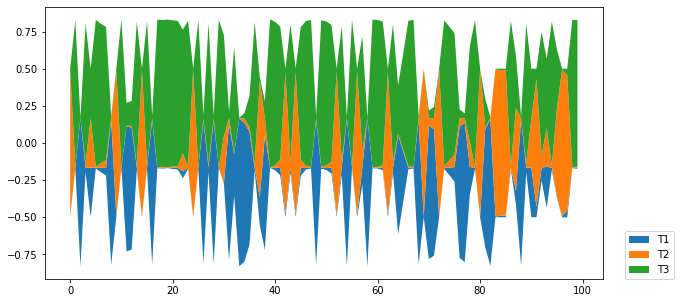

In [304]:
x_axis = corpus_df2.index
y_axis = features

fig, ax = plt.subplots(figsize=(10,5))

# Plot a stackplot - https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/stackplot_demo.html
ax.stackplot(x_axis, y_axis.T, baseline='wiggle', labels=y_axis.columns)

# Move the legend off of the chart
ax.legend(loc=(1.04,0))

In [307]:
from tmtoolkit.topicmod.evaluate import metric_coherence_gensim

In [310]:
model.components_

array([[1.99622656, 4.43427231, 2.12298073, ..., 2.10537896, 4.59528939,
        1.20741198],
       [2.18366783, 0.65372205, 0.46146093, ..., 0.60133333, 2.12917148,
        1.24868343],
       [1.22940268, 2.75627593, 2.02141124, ..., 7.50715219, 1.86656863,
        0.50491256]])

In [334]:
# lda_model - LatentDirichletAllocation()
# vect - CountVectorizer()
# texts - the list of tokenized words
norm_corpus
norm_corpus_tokens = [doc.split() for doc in norm_corpus]


metric_coherence_gensim(measure='c_v', 
                        top_n=5, 
                        topic_word_distrib= model.components_, 
                        dtm=cv.fit_transform(norm_corpus), 
                        vocab=np.array(cv.get_feature_names()), 
                        texts=norm_corpus_tokens)

[0.514889678590938, 0.21459892616206094, 0.24997943126350197]